<a href="https://colab.research.google.com/github/dataqueenpend/DS_From_Zero_To_Hero/blob/gh-pages/Machine_Learning_with_Tree_Based_Models_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning with Tree-Based Models in Python

course from DataCamp
modified notes and solved exercises by me

Decision trees are supervised learning models used for problems involving classification and regression.

>  Tree models present a high flexibility that comes at a price: on one hand, trees are able to capture complex non-linear relationships; on the other hand, they are prone to memorizing the noise present in a dataset. 


By aggregating the predictions of trees that are trained differently, ensemble methods take advantage of the flexibility of trees while reducing their tendency to memorize noise.

>  Ensemble methods are used across a variety of fields and have a proven track record of winning many machine learning competitions

Covered in this notebook:
* how to use Python to train decision trees and tree-based models with the user-friendly scikit-learn machine learning library
* understand the advantages and shortcomings of trees and demonstrate how ensembling can alleviate these shortcomings
*  understand how to tune the most influential hyperparameters in order to get the most out of your models.


##Classification and Regression Trees
*Classification and Regression Trees (CART) are a set of supervised learning models used for problems involving classification and regression.*
###Decision tree for classification
**Classification-tree**
Given a labeled dataset, a classification tree learns a sequence of if-else questions about individual features in order to infer the labels.

> In contrast to linear models, trees are able to capture non-linear relationships between features and labels. 

 In addition, trees don't require the features to be on the same scale through standardization for example.

 To understand trees more concretely, we'll try to predict whether a tumor is malignant or benign in the Wisconsin Breast Cancer dataset using only 2 features.

 * The figure here shows a scatterplot of two cancerous cell features with malignant-tumors in blue and benign-tumors in red.


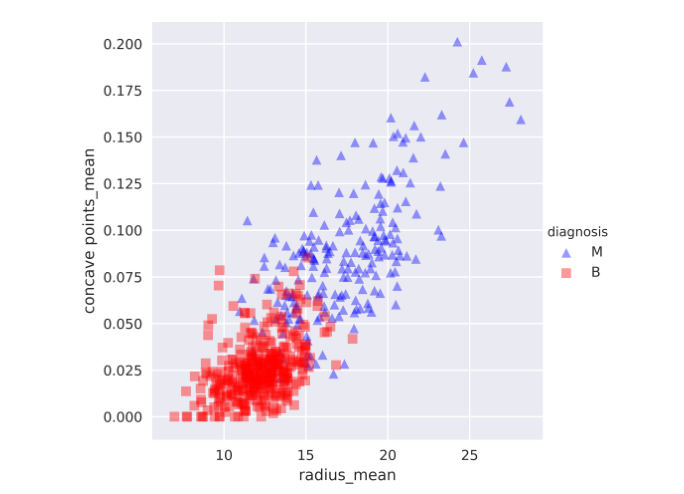

**Decision-tree Diagram**

When a classification tree is trained on this dataset, the tree learns a sequence of if-else questions with each question involving one feature and one split-point.

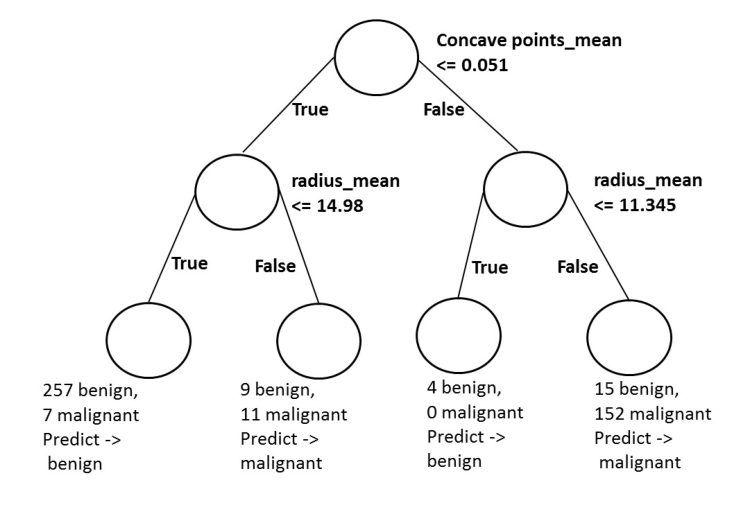

> At the top, the tree asks whether the concave-points mean of an instance is <= 0-point-051.
* If it is, the instance traverses the True branch;
* otherwise, it traverses the False branch. 

Similarly, the instance keeps traversing the internal branches until it reaches an end. The label of the instance is then predicted to be that of the prevailing class at that end. 

> The maximum number of branches separating the top from an extreme-end is known as the maximum depth which is equal to 2 here.

**Classification-tree in scikit-learn**

* import DecisionTreeClassifier from sklearn.tree as shown in line 1. Also, import the functions train_test_split() from sklearn.model_selection and accuracy_score() from sklearn.metrics

```
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Import train_test_split
from sklearn.model_selection import train_test_split
# Import accuracy_score
from sklearn.metrics import accuracy_score
```

* In order to obtain an unbiased estimate of a model's performance, you must evaluate it on an unseen test set. To do so, first split the data into 80% train and 20% test using train_test_split(). Set the parameter stratify to y in order for the train and test sets to have the same proportion of class labels as the unsplit dataset.

```
# Split the dataset into 80% train, 20% test
X_train, X_test, y_train, y_test= train_test_split(X, y,
test_size=0.2,
stratify=y,
random_state=1)
```

* use DecisionTreeClassifier() to instantiate a tree classifier, dt with a maximum depth of 2 by setting the parameter max_depth to 2. Note that the parameter random_state is set to 1 for reproducibility.

```
# Instantiate dt
dt = DecisionTreeClassifier(max_depth=2, random_state=1)
```

*  call the fit method on dt and pass X_train and y_train. To predict the labels of the test-set, call the predict method on dt. Finally print the accuracy of the test set using accuracy_score(). 

```
 Fit dt to the training set
dt.fit(X_train,y_train)
# Predict the test set labels
y_pred = dt.predict(X_test)
# Evaluate the test-set accuracy
accuracy_score(y_test, y_pred)
0.90350877192982459
```

**Decision Regions**
A classification-model divides the feature-space into regions where all instances in one region are assigned to only one class-label. These regions are known as decision-regions.

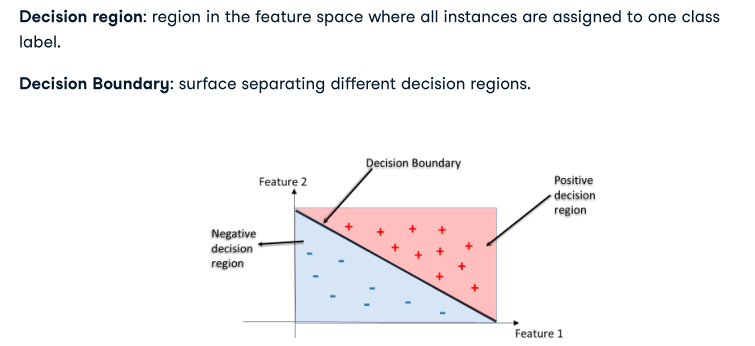


> Decision-regions are separated by surfaces called decision-boundaries. The figure here shows the decision-regions of a linear-classifier. Note how the boundary is a straight-line.

**Decision Regions: CART vs. Linear Model**

In contrast, as shown here on the right, a classification-tree produces rectangular decision-regions in the feature-space. This happens because at each split made by the tree, only one feature is involved.

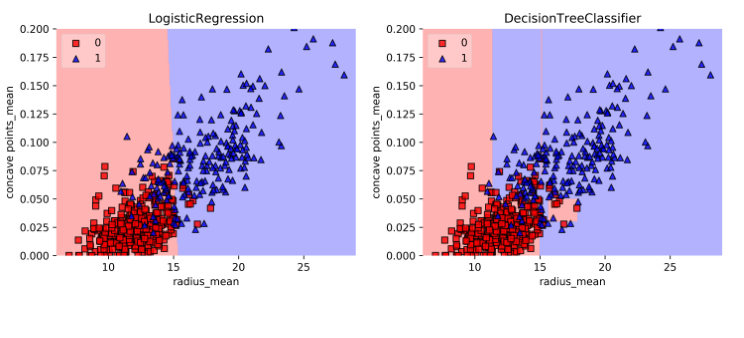

**Train your first classification tree**

You'll predict whether a tumor is malignant or benign based on two features: the mean radius of the tumor (radius_mean) and its mean number of concave points (concave points_mean).

The dataset is already loaded in your workspace and is split into 80% train and 20% test. The feature matrices are assigned to X_train and X_test, while the arrays of labels are assigned to y_train and y_test where class 1 corresponds to a malignant tumor and class 0 corresponds to a benign tumor. To obtain reproducible results, we also defined a variable called SEED which is set to 1.

* Import DecisionTreeClassifier from sklearn.tree.

* Instantiate a DecisionTreeClassifier dt of maximum depth equal to 6.

* Fit dt to the training set.

* Predict the test set labels and assign the result to y_pred.


```
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=SEED)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])
```

```
[0 0 0 1 0]
```

> You can see the first five predictions made by the fitted tree on the test set in the console.

**Evaluate the classification tree**

Now that you've fit your first classification tree, it's time to evaluate its performance on the test set. You'll do so using the accuracy metric which corresponds to the fraction of correct predictions made on the test set.

The trained model dt from the previous exercise is loaded in your workspace along with the test set features matrix X_test and the array of labels y_test.

* Import the function accuracy_score from sklearn.metrics.

* Predict the test set labels and assign the obtained array to y_pred.

* Evaluate the test set accuracy score of dt by calling accuracy_score() and assign the value to acc.

```
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))
```

```
Test set accuracy: 0.89
```

> Using only two features, your tree was able to achieve an accuracy of 89%!

**Logistic regression vs classification tree**

A classification tree divides the feature space into rectangular regions.

We have written a custom function called plot_labeled_decision_regions() that you can use to plot the decision regions of a list containing two trained classifiers.

```
plot_labeled_decision_regions(X, y, models)
    Function producing a scatter plot of the instances contained 
    in the 2D dataset (X,y) along with the decision 
    regions of two trained classification models contained in the
    list 'models'.
            
    Parameters
    ----------
    X: pandas DataFrame corresponding to two numerical features 
    y: pandas Series corresponding the class labels
    models: list containing two trained classifiers
```

* Import LogisticRegression from sklearn.linear_model.

* Instantiate a LogisticRegression model and assign it to logreg.

* Fit logreg to the training set.

* Review the plot generated by plot_labeled_decision_regions().

```
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import  LogisticRegression

# Instatiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_train, y_train)

# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]

# Review the decision regions of the two classifiers
plot_labeled_decision_regions(X_test, y_test, clfs)
```

```
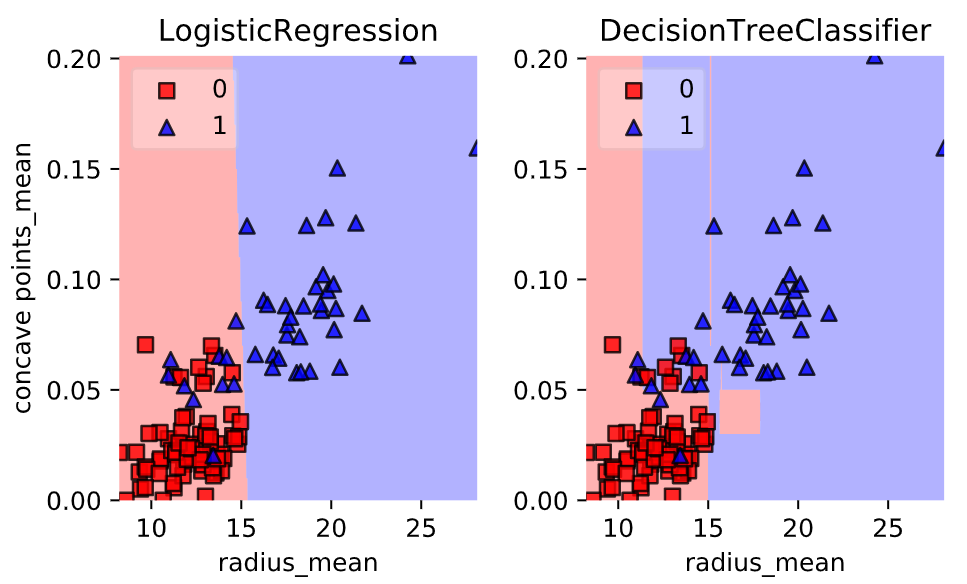

> Notice how the decision boundary produced by logistic regression is linear while the boundaries produced by the classification tree divide the feature space into rectangular regions.

###Classification tree Learning

**Building Blocks of a Decision-Tree**

A decision-tree is a data-structure consisting of a hierarchy of individual units called nodes. **A node is a point that involves either a question or a prediction.**

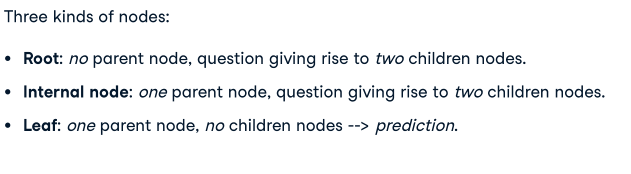

* The root is the node at which the decision-tree starts growing. It has no parent node and involves a question that gives rise to 2 children nodes through two branches. 
* An internal node is a node that has a parent. It also involves a question that gives rise to 2 children nodes. 
*  a node that has no children is called a leaf. A leaf has one parent node and involves no questions. It's where a prediction is made. 

>  Recall that when a classification tree is trained on a labeled dataset, the tree learns patterns from the features in such a way to produce the purest leafs. 

*the tree is trained in such a way so that, in each leaf, one class-label is predominant.*

In the tree diagram shown here, consider the case where an instance traverses the tree to reach the leaf on the left. 

>  In this leaf, there are 257 instances classified as benign and 7 instances classified as malignant.

As a result, the tree's prediction for this instance would be: 'benign'. In order to understand how a classification tree produces the purest leafs possible, let's first define the concept of information gain.

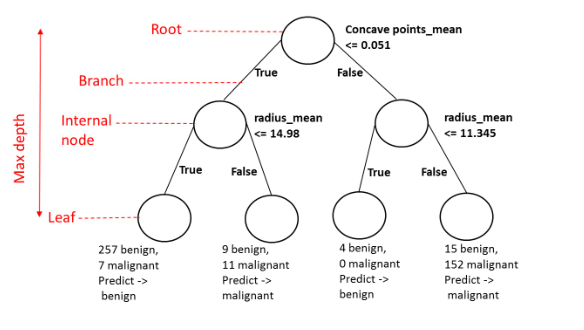

**Information Gain (IG)**

The nodes of a classification tree are grown recursively; in other words, **the obtention of an internal node or a leaf depends on the state of its predecessors.**

To produce the purest leafs possible, at each node, a tree asks a question involving one feature f and a split-point sp. 
> But how does it know which feature and which split-point to pick?

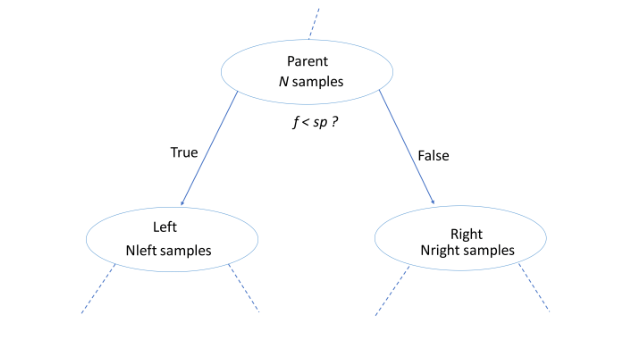

The tree considers that every node contains information and aims at maximizing the Information Gain obtained after each split. Consider the case where a node with N samples is split into a left-node with Nleft samples and a right-node with Nright samples.

The information gain for such split is given by the formula:

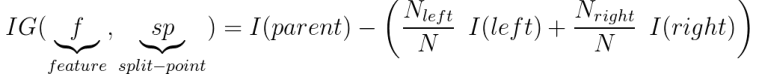

*'What criterion is used to measure the impurity of a node?'*

> there are different criteria you can use among which are the gini-index and entropy

**Classification-Tree Learning**

When an unconstrained tree is trained, the nodes are grown recursively. In other words, a node exists based on the state of its predecessors. 

>  At a *non-leaf node*, the data is split based on feature f and split-point sp in such a way to maximize information gain.

 If the information gain obtained by splitting a node is null, the node is declared a leaf.

 Keep in mind that these rules are for unconstrained trees. If you constrain the maximum depth of a tree to 2 for example, all nodes having a depth of 2 will be declared leafs even if the information gain obtained by splitting such nodes is not null.

 **Information Criterion in scikit-learn**

 * you can set the information criterion of dt to the gini-index by setting the criterion parameter to 'gini' as shown on the last line here.

 ```
 # Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Import train_test_split
from sklearn.model_selection import train_test_split
# Import accuracy_score
from sklearn.metrics import accuracy_score
# Split dataset into 80% train, 20% test
X_train, X_test, y_train, y_test= train_test_split(X, y,
test_size=0.2,
stratify=y,
random_state=1)
# Instantiate dt, set 'criterion' to 'gini'
dt = DecisionTreeClassifier(criterion='gini', random_state=1)
```

* Now fit dt to the training set and predict the test set labels. Then determine dt's test set accuracy which evaluates to about 92%.

```
# Fit dt to the training set
dt.fit(X_train,y_train)
# Predict test-set labels
y_pred= dt.predict(X_test)
# Evaluate test-set accuracy
accuracy_score(y_test, y_pred)
0.92105263157894735
```

**Using entropy as a criterion**

train a classification tree on the Wisconsin Breast Cancer dataset using entropy as an information criterion. You'll do so using all the 30 features in the dataset, which is split into 80% train and 20% test.

X_train as well as the array of labels y_train are available in your workspace.

* Import DecisionTreeClassifier from sklearn.tree.

* Instantiate a DecisionTreeClassifier dt_entropy with a maximum depth of 8.

* Set the information criterion to 'entropy'.

* Fit dt_entropy on the training set.

```
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)
```

**Entropy vs Gini index**

compare the test set accuracy of dt_entropy to the accuracy of another tree named dt_gini. The tree dt_gini was trained on the same dataset using the same parameters except for the information criterion which was set to the gini index using the keyword 'gini'.

X_test, y_test, dt_entropy, as well as accuracy_gini which corresponds to the test set accuracy achieved by dt_gini are available in your workspace.

* Import accuracy_score from sklearn.metrics.
* Predict the test set labels of dt_entropy and assign the result to y_pred.
* Evaluate the test set accuracy of dt_entropy and assign the result to accuracy_entropy.
* Review accuracy_entropy and accuracy_gini.

```
# Import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

# Use dt_entropy to predict test set labels
y_pred = dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)

# Print accuracy_entropy
print('Accuracy achieved by using entropy: ', accuracy_entropy)

# Print accuracy_gini
print('Accuracy achieved by using the gini index: ', accuracy_gini)
```

```
    Accuracy achieved by using entropy:  0.929824561404
    Accuracy achieved by using the gini index:  0.929824561404
```

> Notice how the two models achieve exactly the same accuracy. Most of the time, the gini index and entropy lead to the same results. The gini index is slightly faster to compute and is the default criterion used in the DecisionTreeClassifier model of scikit-learn.

###Decision tree for regression

in regression, the target variable is continuous, so the output of the model is a real number. 

Decision tree for regression on a dataset example

Dataset consists of 6 features corresponding to the characteristics of a car and a continuous target variable labeled mpg which stands for miles-per-gallon. Our task is to predict the mpg consumption of a car given these six features. To simplify the problem, here the analysis is restricted to only one feature corresponding to the displacement of a car. This feature is denoted by displ.

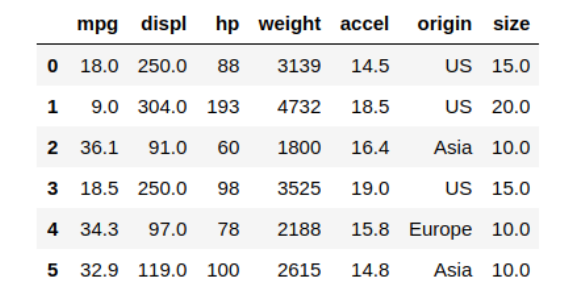

A 2D scatter plot of mpg versus displ shows that the mpg-consumption decreases nonlinearly with displacement. 
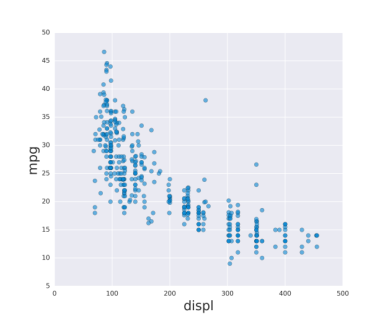


> Note that linear models such as linear regression would not be able to capture such a non-linear trend.

**Regression-Tree in scikit-learn**

* import DecisionTreeRegressor from sklearn-dot-tree and the functions train_test_split() from sklearn-dot-model_selection and mean_squared_error as MSE() from sklearn-dot-metrics. Then, split the data into 80%-train and 20%-test using train_test_split. 

```
# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
# Import train_test_split
from sklearn.model_selection import train_test_split
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE
# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test= train_test_split(X, y,
test_size=0.2,
random_state=3)
```

*  instantiate the DecisionTreeRegressor() with a maximum depth of 4 by setting the parameter max_depth to 4. In addition, set the parameter min_sample_leaf to 0-dot-1 to impose a stopping condition in which each leaf has to contain at least 10% of the training data.

```
# Instantiate a DecisionTreeRegressor 'dt'
dt = DecisionTreeRegressor(max_depth=4,
min_samples_leaf=0.1,
random_state=3)
```

* fit dt to the training set and predict the test set labels. To obtain the root-mean-squared-error of your model on the test-set;
  * evaluate the mean-squared error, 
  * then, raise the obtained value to the power 1/2
  * print dt's test set rmse to obtain a value of 5-dot-1.

```
# Fit 'dt' to the training-set
dt.fit(X_train, y_train)
# Predict test-set labels
y_pred = dt.predict(X_test)
# Compute test-set MSE
mse_dt = MSE(y_test, y_pred)
# Compute test-set RMSE
rmse_dt = mse_dt**(1/2)
# Print rmse_dt
print(rmse_dt)
5.1023068889
```


> it's important to note that, when a regression tree is trained on a dataset, the **impurity of a node is measured using the mean-squared error of the targets** in that node. 

The regression tree tries to find the splits that produce leafs where in each leaf the target values are on average, the closest possible to the mean-value of the labels in that particular leaf.

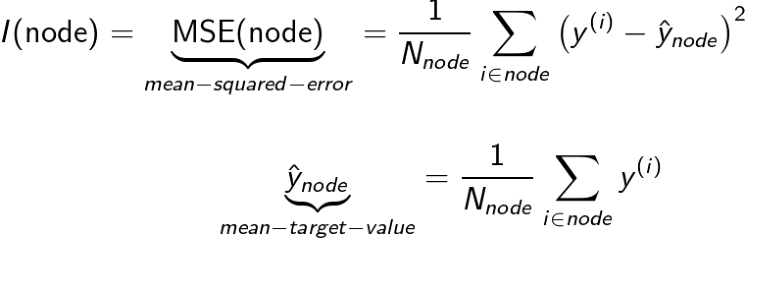

As a new instance traverses the tree and reaches a certain leaf, its target-variable 'y' is computed as the average of the target-variables contained in that leaf as shown in this formula.

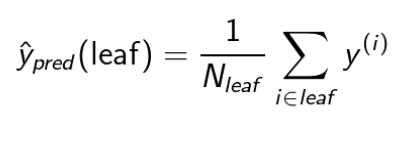

**Linear Regression vs. Regression-Tree**

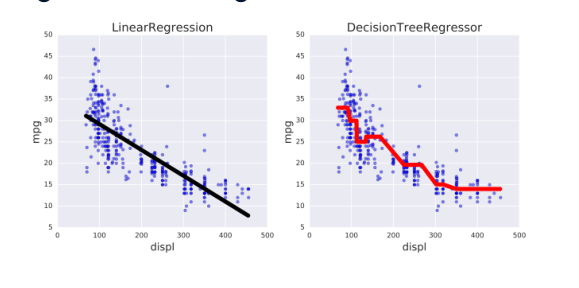

The difference between those is the best described in a picture. Look how flexible regression tree is compared to the Linear Regression.

* The linear model fails to capture the non-linear trend exhibited by the data. 
* The regression tree shows a greater flexibility and is able to capture the non-linearity, though not fully. 

**Train your first regression tree**

Train a regression tree to predict the mpg (miles per gallon) consumption of cars in the auto-mpg dataset using all the six available features.

The dataset is processed for you and is split to 80% train and 20% test. The features matrix X_train and the array y_train are available in your workspace.

* Import DecisionTreeRegressor from sklearn.tree.
* Instantiate a DecisionTreeRegressor dt with maximum depth 8 and min_samples_leaf set to 0.13.
* Fit dt to the training set.

```
# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8,
             min_samples_leaf= 0.13,
            random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train)
```

**Evaluate the regression tree**

Evaluate the test set performance of dt using the Root Mean Squared Error (RMSE) metric. The RMSE of a model measures, on average, how much the model's predictions differ from the actual labels. The RMSE of a model can be obtained by computing the square root of the model's Mean Squared Error (MSE).

The features matrix X_test, the array y_test, as well as the decision tree regressor dt that you trained in the previous exercise are available in your workspace.

* Import the function mean_squared_error as MSE from sklearn.metrics.
* Predict the test set labels and assign the output to y_pred.
* Compute the test set MSE by calling MSE and assign the result to mse_dt.
* Compute the test set RMSE and assign it to rmse_dt.

```
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt =  mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))
```

```
    Test set RMSE of dt: 4.37
```

**Linear regression vs regression tree**

Compare the test set RMSE of dt to that achieved by a linear regression model. We have already instantiated a linear regression model lr and trained it on the same dataset as dt.

The features matrix X_test, the array of labels y_test, the trained linear regression model lr, mean_squared_error function which was imported under the alias MSE and rmse_dt from the previous exercise are available in your workspace.

* Predict test set labels using the linear regression model (lr) and assign the result to y_pred_lr.

* Compute the test set MSE and assign the result to mse_lr.

* Compute the test set RMSE and assign the result to rmse_lr.

```
# Predict test set labels 
y_pred_lr = lr.predict(X_test)

# Compute mse_lr
mse_lr = MSE(y_test, y_pred_lr)

# Compute rmse_lr
rmse_lr = mse_lr**(1/2)

# Print rmse_lr
print('Linear Regression test set RMSE: {:.2f}'.format(rmse_lr))

# Print rmse_dt
print('Regression Tree test set RMSE: {:.2f}'.format(rmse_dt))
```

```
    Linear Regression test set RMSE: 5.10
    Regression Tree test set RMSE: 4.37
```

##The Bias-Variance Tradeoff

###Generalization Error

**Supervised Learning - Under the Hood**

In supervised learning, you make the assumption that there's a mapping f between features and labels. You can express this as y=f(x). f which is shown in red here is an unknown function that you want to determine. In reality, data generation is always accompanied with randomness or noise like the blue points shown here.

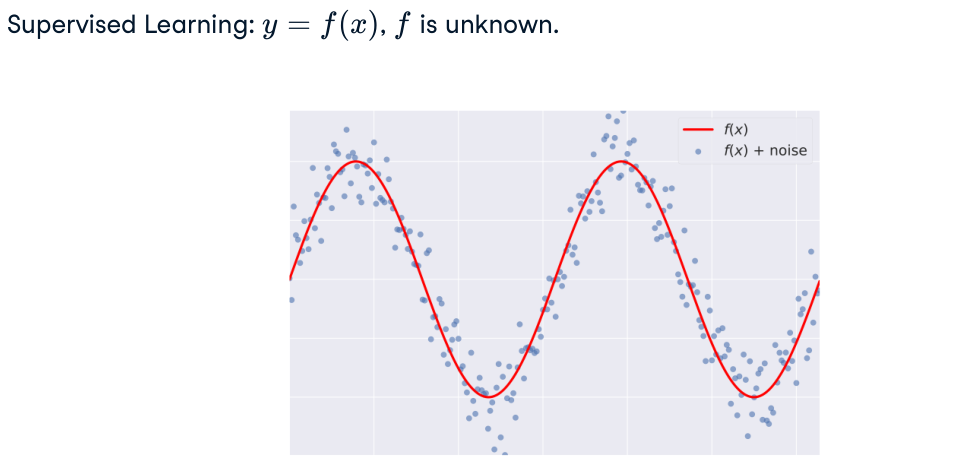

> Your goal is to find a model that best approximates f.

 When training fhat, you want to make sure that noise is discarded as much as possible. At the end, fhat should achieve a low predictive error on unseen datasets.

 **You may encounter two difficulties when approximating f.**:
 * overfitting, it's when fhat fits the noise in the training set. 
 * underfitting, it's when fhat is not flexible enough to approximate f.

*When a model overfits the training set, its predictive power on unseen datasets is pretty low.*
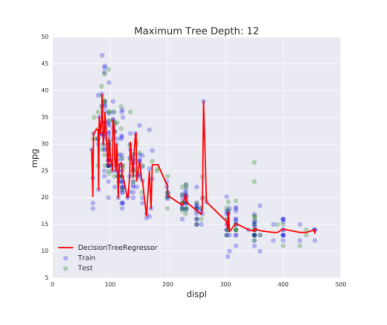
This is illustrated by the predictions of the decision tree regressor shown here in red. The model clearly memorized the noise present in the training set. Such model achieves a low training set error and a high test set error.


*When a model underfits the data, the training set error is roughly equal to the test set error. However, both errors are relatively high.*
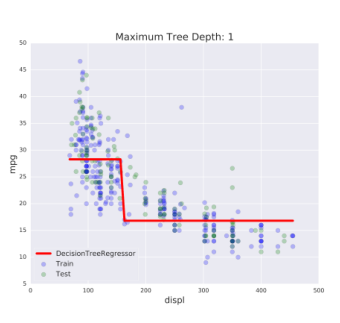

The trained model isn't flexible enough to capture the complex dependency between features and labels. In analogy, it's like teaching calculus to a 3-year old. **The child does not have the required mental abstraction level that enables him to understand calculus**.

**Generalization Error**

The generalization error of a model tells you how much it generalizes on unseen data.

 It can be decomposed into 3 terms: 
 * *bias*-  tells, on average, how much fhat and f are different. High bias models lead to underfitting.
 * *variance* - tells, how much fhat is inconsistent over different training sets. High variance models lead to overfitting.
 * and *irreducible error* where the irreducible error is the error contribution of noise. 

 To illustrate this consider the high bias model shown here in black; this model is not flexible enough to approximate the true function f shown in red. 


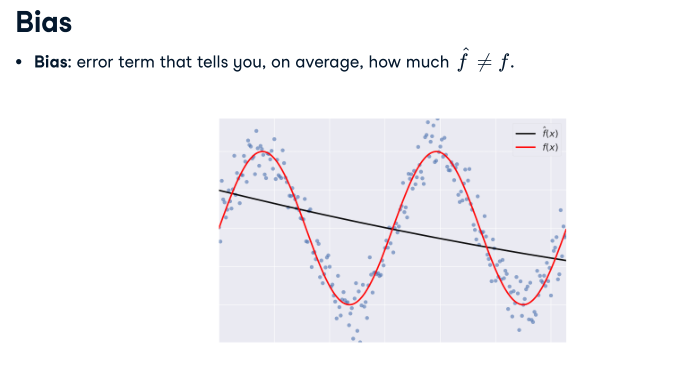


Consider the high variance model shown here in black; in this case, fhat follows the training data points so closely that it misses the true function f shown in red. 
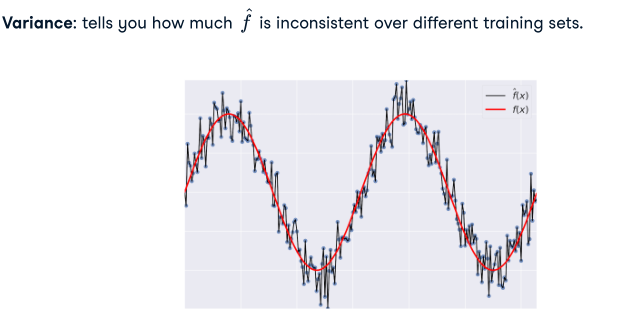


The complexity of a model sets its flexibility to approximate the true function f. 

**Bias-Variance Tradeoff**

The diagram here shows how the best model complexity corresponds to the lowest generalization error. When the model complexity increases, the variance increases while the bias decreases.

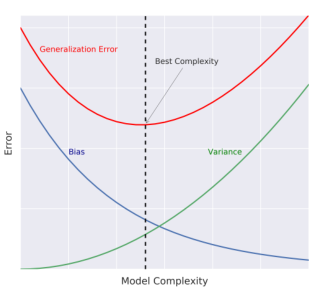

Conversely, when model complexity decreases, variance decreases and bias increases. **Your goal is to find the model complexity that achieves the lowest generalization error.**

Since this error is the sum of three terms with the irreducible error being constant, you need to find a balance between bias and variance because as one increases the other decreases. **This is known as the bias-variance trade-off**.

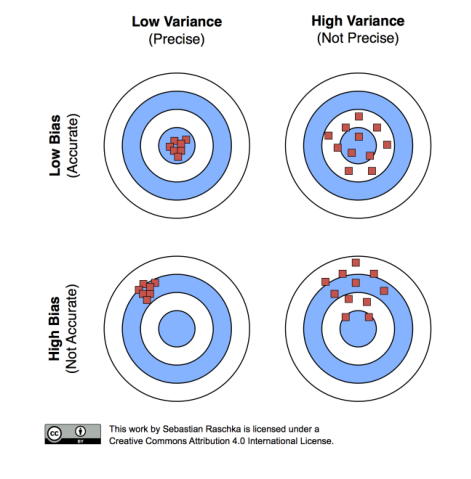

> Visually, you can imagine approximating fhat as aiming at the center of a shooting-target where the center is the true function f.

* If fhat is low bias and low variance, your shots will be closely clustered around the center. 
* If fhat is high variance and high bias, not only will your shots miss the target but they would also be spread all around the shooting target.

###Diagnose bias and variance problems

**Estimating the Generalization Error**

Split the data into a training and test set. The model fhat can then be fit to the training set and its error can be evaluated on the test set. The generalization error of fhat is roughly approximated by fhat's error on the test set.

* split the data to training and test sets,
* fit fhat to the training set,
* evaluate the error of fhat on the unseen test set.
* generalization error of fhat ≈ test set error of .

You cannot estimated Generalization Error directly because of unpredictability of the noise and unknown value of f. 

**Better Model Evaluation with Cross-Validation**

Usually, **the test set** should be kept untouched until one is confident about fhat's performance. It **should only be used to evaluate fhat's final performance or error**.

> Now, evaluating fhat's performance on the training set may produce an optimistic estimation of the error because fhat was already exposed to the training set when it was fit. 

. To obtain a reliable estimate of fhat's performance, you should use a technique called cross-validation or CV. CV can be performed using **K-Fold-CV** or hold-out-CV . 

K-Fold CV

* First, the training set (T) is split randomly into 10 partitions or folds, 
* The error of fhat is evaluated 10 times on the 10 folds, 
* Each time, one fold is picked for evaluation after training fhat on the other 9 folds. 
* At the end, you'll obtain a list of 10 errors.

* Finally the CV-error is computed as the mean of the 10 obtained errors.

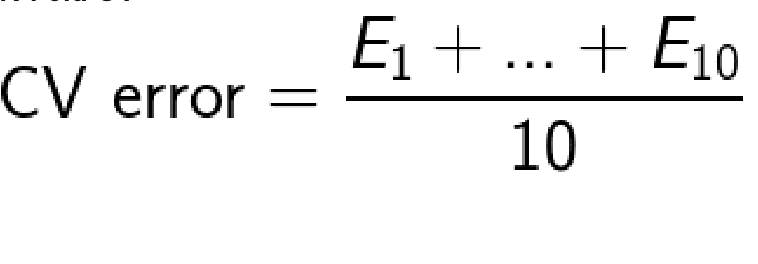







**Diagnose Variance/Bias Problems**

Once you have computed fhat's cross-validation-error, you can check if it is greater than fhat's training set error.
* **If it is greater**, fhat is said to suffer from **high variance**. In such case, fhat has overfit the training set. **To remedy this try decreasing fhat's complexity**.

> For example, in a decision tree you can reduce the maximum-tree-depth or increase the maximum-samples-per-leaf. In addition, you may also gather more data to train fhat.

* if its cross-validation-error is **roughly equal to the training error but much greater than the desired error**,  fhat is said to suffer from **high bias**. In such case fhat underfits the training set. **To remedy this try increasing the model's complexity or gather more relevant features for the problem.**

**K-Fold CV in sklearn**

In addition to the usual imports, you should also import the function cross_val_score() from sklearn-dot-model_selection. 

* split the dataset into 70%-train and 30%-test using train_test_split().

```
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
# Set seed for reproducibility
SEED = 123
# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X,y,
test_size=0.3,
random_state=SEED)
```

*  Then, instantiate a DecisionTreeRegressor() dt with the parameters max_depth set to 4 and min_samples_leaf to 0-dot-14.
```
# Instantiate decision tree regressor and assign it to 'dt'
dt = DecisionTreeRegressor(max_depth=4,
min_samples_leaf=0.14,
random_state=SEED)
```

* call cross_val_score() by passing dt, X_train, y_train; set the parameters cv to 10 for 10-fold-cross-validation and scoring to neg_mean_squared_error to compute the negative-mean-squared-errors. 

> The scoring parameter was set so because cross_val_score() does not allow computing the mean-squared-errors directly. 

 set n_jobs to -1 to exploit all available CPUs in computation.

```
# Evaluate the list of MSE ontained by 10-fold CV
# Set n_jobs to -1 in order to exploit all CPU cores in computation
MSE_CV = - cross_val_score(dt, X_train, y_train, cv= 10,
scoring='neg_mean_squared_error',
n_jobs = -1)
```

> The result is a numpy-array of the 10 negative mean-squared-errors achieved on the 10-folds.

* *You can multiply the result by minus-one to obtain an array of CV-MSE*. After that, fit dt to the training set and evaluate the labels of the training and test sets.

```
# Fit 'dt' to the training set
dt.fit(X_train, y_train)
# Predict the labels of training set
y_predict_train = dt.predict(X_train)
# Predict the labels of test set
y_predict_test = dt.predict(X_test)
```

> The CV-mean-squared-error can be determined as the mean of MSE_CV.

* use the function MSE to evaluate the train and test set mean-squared-errors. Given that the training set error is smaller than the CV-error, we can deduce that dt overfits the training set and that it suffers from high variance. 

```
# CV MSE
print('CV MSE: {:.2f}'.format(MSE_CV.mean()))
CV MSE: 20.51
# Training set MSE
print('Train MSE: {:.2f}'.format(MSE(y_train, y_predict_train)))
Train MSE: 15.30
# Test set MSE
print('Test MSE: {:.2f}'.format(MSE(y_test, y_predict_test)))
Test MSE: 20.92
```



> Notice how the CV and test set errors are roughly equal.

**Instantiate the model**

Diagnose the bias and variance problems of a regression tree. The regression tree you'll define in this exercise will be used to predict the mpg consumption of cars from the auto dataset using all available features.

The data is already processed the data and loaded the features matrix X and the array y in your workspace. In addition, the DecisionTreeRegressor class was imported from sklearn.tree.

* Import train_test_split from sklearn.model_selection.
* Split the data into 70% train and 30% test.
* Instantiate a DecisionTreeRegressor with max depth 4 and min_samples_leaf set to 0.26.

```
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Set SEED for reproducibility
SEED = 1

# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X,y,
test_size=0.3,
random_state=SEED)

# Instantiate a DecisionTreeRegressor dt
dt = DecisionTreeRegressor(min_samples_leaf=0.26, max_depth=4, random_state=SEED)
```

**Evaluate the 10-fold CV error**

Evaluate the 10-fold CV Root Mean Squared Error (RMSE) achieved by the regression tree dt that you instantiated in the previous exercise.

In addition to dt, the training data including X_train and y_train are available in your workspace. We also imported cross_val_score from sklearn.model_selection.

Note that since cross_val_score has only the option of evaluating the negative MSEs, its output should be multiplied by negative one to obtain the MSEs. The CV RMSE can then be obtained by computing the square root of the average MSE.

* Compute dt's 10-fold cross-validated MSE by setting the scoring argument to 'neg_mean_squared_error'.

* Compute RMSE from the obtained MSE scores.

```
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt, X_train, y_train, cv= 10,
scoring='neg_mean_squared_error',
n_jobs = -1)

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))
```

```
CV RMSE: 5.14
```

> A very good practice is to keep the test set untouched until you are confident about your model's performance. CV is a great technique to get an estimate of a model's performance without affecting the test set.

**Evaluate the training error**

Evaluate the training set RMSE achieved by the regression tree dt that you instantiated in a previous exercise.

In addition to dt, X_train and y_train are available in your workspace.

Note that in scikit-learn, the MSE of a model can be computed as follows:

```
MSE_model = mean_squared_error(y_true, y_predicted)
```

where we use the function mean_squared_error from the metrics module and pass it the true labels y_true as a first argument, and the predicted labels from the model y_predicted as a second argument.

* Import mean_squared_error as MSE from sklearn.metrics.
* Fit dt to the training set.
* Predict dt's training set labels and assign the result to y_pred_train.
* Evaluate dt's training set RMSE and assign it to RMSE_train

```
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict the labels of the training set
y_pred_train = dt.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (mean_squared_error(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))
```

```
Train RMSE: 5.15
```

> Notice how the training error is roughly equal to the 10-folds CV error you obtained in the previous exercise.

###Ensemble Learning
*a supervised learning technique*

**Advantages of CARTs**

* easy to understand and their output is easy to interpret.
* easy to use and their flexibility gives them an ability to describe nonlinear dependencies between features and labels. 
* don't need a lot of feature preprocessing to train a CART.
* don't have to standardize or normalize features before feeding them to a CART.

**Limitations of CARTs**

* A classification tree for example, is only able to produce orthogonal decision boundaries. 
*  very sensitive to small variations in the training set. 
> Sometimes, when a single point is removed from the training set, a CART's learned parameters may changed drastically.
* suffer from high variance when they are trained without constraints. In such case, they may overfit the training set. 

> A solution that takes advantage of the flexibility of CARTs while reducing their tendency to memorize noise is ensemble learning.

**Ensemble Learning**

*  different models are trained on the same dataset. 
* Each model makes its own predictions. 
* A meta-model then aggregates the predictions of individual models and outputs a final prediction. 
* The final prediction is more robust and less prone to errors than each individual model. 
* The best results are obtained when the models are skillful but in different ways meaning that if some models make predictions that are way off, the other models should compensate these errors. In such case, the meta-model's predictions are more robust.

**How ensemble learning works for a classification problem?**

1. First, the training set is fed to different classifiers. 
2. Each classifier learns its parameters and makes predictions.
3. Then these predictions are fed to a meta model which aggregates them and outputs a final prediction.

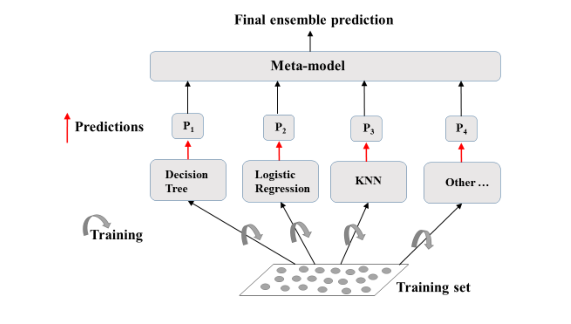

**Consider a binary classification task...**

The ensemble here consists of N classifiers making the predictions P0,P1,to,PN with P=0-or-1. The meta model outputs the final prediction by hard voting.

To understand** hard voting**, consider a voting classifier that consists of 3 trained classifiers as shown in the diagram here.

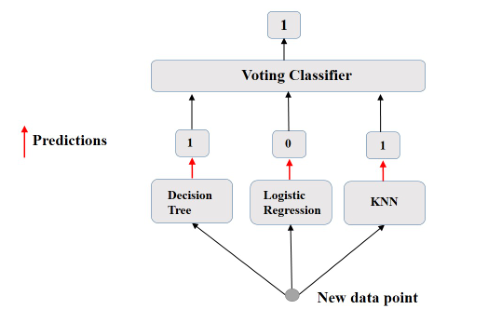

While classifiers 1 and 3 predict the label of 1 for a new data-point, classifier 2 predicts the label 0. In this case, 1 has 2 votes while 0 has 1 vote. As a result, the voting classifier predicts 1.

**Voting Classifier in sklearn**

Let's trainf voting classifier, using all the features in the dataset. 

* In addition to the usual imports, import LogisticRegression, DecisionTreeClassifier and KNeighborsClassifier. You also need to import VotingClassifier from sklearn-dot-ensemble.

```
# Import functions to compute accuracy and split data
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# Import models, including VotingClassifier meta-model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier
# Set seed for reproducibility
SEED = 1
```

* split the data into 70%-train and 30%-test and instantiate the different models as shown here. 

```
# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size= 0.3,
random_state= SEED)
# Instantiate individual classifiers
lr = LogisticRegression(random_state=SEED)
knn = KNN()
dt = DecisionTreeClassifier(random_state=SEED)
```

* define a list named classifiers that contains tuples corresponding the the name of the models and the models themselves.
```
# Define a list called classifier that contains the tuples (classifier_name, classifier)
classifiers = [('Logistic Regression', lr),
('K Nearest Neighbours', knn),
('Classification Tree', dt)]
```

* write a for loop to iterate over the list classifiers; fit each classifier to the training set, evaluate its accuracy on the test set and print the result. 

```
# Iterate over the defined list of tuples containing the classifiers
for clf_name, clf in classifiers:
  #fit clf to the training set
  clf.fit(X_train, y_train)
  # Predict the labels of the test set
  y_pred = clf.predict(X_test)
  # Evaluate the accuracy of clf on the test set
  print('{:s} : {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))

Logistic Regression: 0.947
K Nearest Neighbours: 0.930
Classification Tree: 0.930
```
> The output shows that the best classifier LogisticRegression achieves an accuracy of 94-dot-7%.

* you can instantiate a voting classifier vc by setting the estimators parameter to classifiers. 

```
# Instantiate a VotingClassifier 'vc'
vc = VotingClassifier(estimators=classifiers)
# Fit 'vc' to the traing set and predict test set labels
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)
# Evaluate the test-set accuracy of 'vc'
print('Voting Classifier: {.3f}'.format(accuracy_score(y_test, y_pred)))

Voting Classifier: 0.953
```

> Fitting vc to the training set yields a test set accuracy of 95-dot-3%. This accuracy is higher than that achieved by any of the individual models in the ensemble.

**Define the ensemble**

Instantiate three classifiers to predict whether a patient suffers from a liver disease using all the features present in the dataset.

The classes LogisticRegression, DecisionTreeClassifier, and KNeighborsClassifier under the alias KNN are available in your workspace.

* Instantiate a Logistic Regression classifier and assign it to lr.

* Instantiate a KNN classifier that considers 27 nearest neighbors and assign it to knn.

* Instantiate a Decision Tree Classifier with the parameter min_samples_leaf set to 0.13 and assign it to dt.

```
# Set seed for reproducibility
SEED=1

# Instantiate lr
lr = LogisticRegression(random_state=SEED)

# Instantiate knn
knn = KNN(n_neighbors=27)

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=SEED)

# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]
```

**Evaluate individual classifiers**

Evaluate the performance of the models in the list classifiers that we defined in the previous exercise. You'll do so by fitting each classifier on the training set and evaluating its test set accuracy.

The dataset is already loaded and preprocessed for you (numerical features are standardized) and it is split into 70% train and 30% test. The features matrices X_train and X_test, as well as the arrays of labels y_train and y_test are available in your workspace. In addition, we have loaded the list classifiers from the previous exercise, as well as the function accuracy_score() from sklearn.metrics.

* Iterate over the tuples in classifiers. Use clf_name and clf as the for loop variables:
  * Fit clf to the training set.
  * Predict clf's test set labels and assign the results to y_pred.
  * Evaluate the test set accuracy of clf and print the result.

```
# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
   
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) 
   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))
```

```
    Logistic Regression : 0.747
    K Nearest Neighbours : 0.724
    Classification Tree : 0.730
```

> Notice how Logistic Regression achieved the highest accuracy of 74.7%.

**Better performance with a Voting Classifier**

Evaluate the performance of a voting classifier that takes the outputs of the models defined in the list classifiers and assigns labels by majority voting.

X_train, X_test,y_train, y_test, the list classifiers defined in a previous exercise, as well as the function accuracy_score from sklearn.metrics are available in your workspace.

* Import VotingClassifier from sklearn.ensemble.
* Instantiate a VotingClassifier by setting the parameter estimators to classifiers and assign it to vc.
* Fit vc to the training set.
* Evaluate vc's test set accuracy using the test set predictions y_pred.

```
# Import VotingClassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Voting Classifier: {:.3f}'.format(accuracy))
```

```
Voting Classifier: 0.753
```

> Notice how the voting classifier achieves a test set accuracy of 75.3%. This value is greater than that achieved by LogisticRegression.

##Bagging and Random Forests

###Bagging

*ensemble method known as Bootstrap aggregation or Bagging.*

In bagging models are not trained on the entire training set. Instead, each model is trained on a different subset of the data.

Bagging stands for bootstrap aggregation. Its name refers to the fact that it uses a technique known as the bootstrap. Bagging **has the effect of reducing the variance of individual models in the ensemble**.

**Bootstrap**

Consider the case where you have 3 balls labeled A, B, and C. 

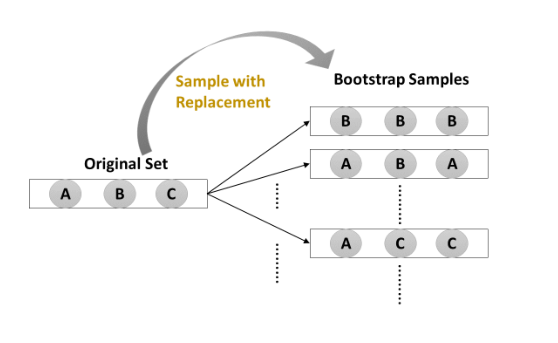

A bootstrap sample is a sample drawn from this with replacement. 

*By replacement, we mean that any ball can be drawn many times.*

>  For example, in the first bootstrap sample shown in the diagram here, B was drawn 3 times in a raw. In the second bootstrap sample, A was drawn two times while B was drawn once, and so on. You may now ask how bootstraping can help us produce an ensemble.

**Bagging**

In the training phase, bagging consists of drawing N different bootstrap samples from the training set. 

As shown in the diagram here, each of these bootstrap samples are then used to train N models that use the same algorithm.

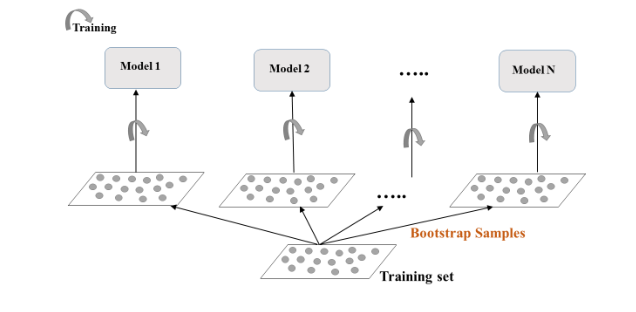

When a new instance is fed to the different models forming the bagging ensemble, each model outputs its prediction. 

The meta model collects these predictions and outputs a final prediction depending on the nature of the problem.

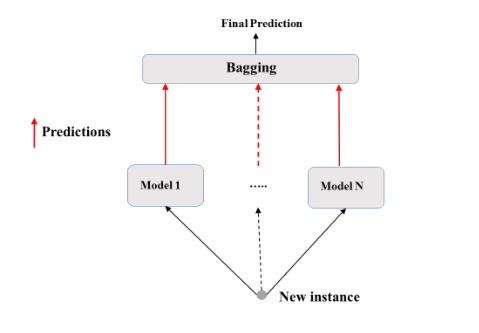

* In classification, the final prediction is obtained by majority voting. The corresponding classifier in scikit-learn is BaggingClassifier. 

* In regression, the final prediction is the average of the predictions made by the individual models forming the ensemble. The corresponding regressor in scikit-learn is BaggingRegressor.

**Bagging Classifier in sklearn**

* import BaggingClassifier, DecisionTreeClassifier, accuracy_score and train_test_split and then split the data into 70%-train and 30%-test as shown here.

```
# Import models and utility functions
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# Set seed for reproducibility
SEED = 1
# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
stratify=y,
random_state=SEED)
```

* instantiate a classification tree dt with the parameters max_depth set to 4 and min_samples_leaf set to 0-dot-16. 

> You can then instantiate a BaggingClassifier bc that consists of 300 classification trees dt. This can be done by setting the parameters base_estimator to dt and n_estimators to 300. 

In addition, set the paramter n_jobs to -1 so that all CPU cores are used in computation. 

```
# Instantiate a classification-tree 'dt'
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16, random_state=SEED)
# Instantiate a BaggingClassifier 'bc'
bc = BaggingClassifier(base_estimator=dt, n_estimators=300, n_jobs=-1)
```

* fit bc to the training set, predict the test set labels and finally, evaluate the test set accuracy. 

```
# Fit 'bc' to the training set
bc.fit(X_train, y_train)
# Predict test set labels
y_pred = bc.predict(X_test)
# Evaluate and print test-set accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Bagging Classifier: {:.3f}'.format(accuracy))

Accuracy of Bagging Classifier: 0.936
```


> The output shows that a BaggingClassifier achieves a test set accuracy of 93-dot-6%. Training the classification tree dt, which is the base estimator here, to the same training set would lead to a test set accuracy of 88-dot-9%. The result highlights how bagging outperforms the base estimator dt.


**Define the bagging classifier**

predict whether a patient suffers from a liver disease using 10 features including Albumin, age and gender. You'll do so using a Bagging Classifier.

* Import DecisionTreeClassifier from sklearn.tree and BaggingClassifier from sklearn.ensemble.

* Instantiate a DecisionTreeClassifier called dt.

* Instantiate a BaggingClassifier called bc consisting of 50 trees.

```
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)
```

**Evaluate Bagging performance**

Now that you instantiated the bagging classifier, it's time to train it and evaluate its test set accuracy.

The Indian Liver Patient dataset is processed for you and split into 80% train and 20% test. The feature matrices X_train and X_test, as well as the arrays of labels y_train and y_test are available in your workspace. In addition, we have also loaded the bagging classifier bc that you instantiated in the previous exercise and the function accuracy_score() from sklearn.metrics.

* Fit bc to the training set.

* Predict the test set labels and assign the result to y_pred.

* Determine bc's test set accuracy.

```
# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test)) 
```

```
Test set accuracy of bc: 0.71
```

 > A single tree dt would have achieved an accuracy of 63% which is 8% lower than bc's accuracy!

###Out of Bag Evaluation

Recall that in bagging, some instances may be sampled several times for one model. On the other hand, other instance may not be sampled at all.

**Out Of Bag (OOB) instances**

* On average, for each model, 63% of the training instances are sampled.
* The remaining 37% constitute the OOB instances.

> Since OOB instances are not seen by a model during training, these can be used to estimate the performance of the ensemble without the need for cross-validation. This technique is known as OOB-evaluation.

Here, for each model, the bootstrap instances are shown in blue while the OOB-instances are shown in red. 

Each of the N models constituting the ensemble is then trained on its corresponding bootstrap samples and evaluated on the OOB instances. 

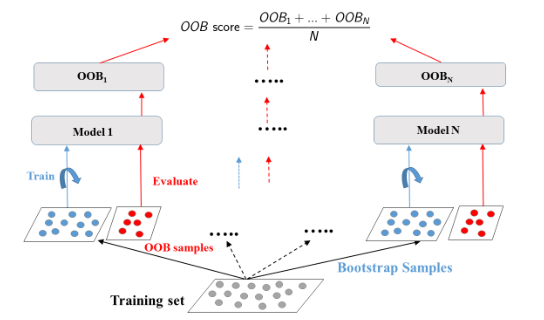

This leads to the obtainment of N OOB scores labeled OOB1 to OOBN. The OOB-score of the bagging ensemble is evaluated as the average of these N OOB scores as shown by the formula on top.

**OOB Evaluation in sklearn**

* import BaggingClassifier, DecisionTreeClassifier, accuracy_score and train_test_split, split the dataset in a stratified way into 70%-train and 30%-test by setting the parameter stratify to y.

```
# Import models and split utility function
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Set seed for reproducibility
SEED = 1

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3,
stratify= y,
random_state=SEED)
```

* instantiate a classification tree dt with a maximum-depth of 4 and a minimum percentage of samples per leaf equal to 16%. Then instantiate a BaggingClassifier called bc that consists of 300 classification trees. 

> This can be done by setting the parameters n_estimators to 300 and base_estimator to dt. Importantly, set the parameter oob_score to True in order to evaluate the OOB-accuracy of bc after training. 

Note that in scikit-learn, the OOB-score corresponds to the accuracy for classifiers and the r-squared score for regressors. 

```
# Instantiate a classification-tree 'dt'
dt = DecisionTreeClassifier(max_depth=4,
min_samples_leaf=0.16,
random_state=SEED)

# Instantiate a BaggingClassifier 'bc'; set oob_score = True
bc = BaggingClassifier(base_estimator=dt, n_estimators=300,
oob_score=True, n_jobs=-1)
```
* fit bc to the training set and predict the test set labels.

```
# Fit 'bc' to the training set
bc.fit(X_train, y_train)

# Predict the test set labels
y_pred = bc.predict(X_test)
```

* Assign the test set accuracy to test_accuracy. Finally, evaluate the OOB-accuracy of bc by extracting the attribute oob_score_ from the trained instance; assign the result to oob_accuracy and print out the results.

```
# Evaluate test set accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Extract the OOB accuracy from 'bc'
oob_accuracy = bc.oob_score_

# Print test set accuracy
print('Test set accuracy: {:.3f}'.format(test_accuracy))

Test set accuracy: 0.936

# Print OOB accuracy
print('OOB accuracy: {:.3f}'.format(oob_accuracy))

OOB accuracy: 0.925

> The test-set accuracy is about 93.6% and the OOB-accuracy is about 92.5%. The two obtained accuracies are pretty close though not exactly equal. 

These results highlight how OOB-evaluation can be an efficient technique to obtain a performance estimate of a bagged-ensemble on unseen data without performing cross-validation.
```

**Compare the OOB accuracy to the test set accuracy**

Compare the OOB accuracy to the test set accuracy of a bagging classifier trained on the Indian Liver Patient dataset.

In sklearn, you can evaluate the OOB accuracy of an ensemble classifier by setting the parameter oob_score to True during instantiation. After training the classifier, the OOB accuracy can be obtained by accessing the .oob_score_ attribute from the corresponding instance.

In your environment, we have made available the class DecisionTreeClassifier from sklearn.tree.

* Import BaggingClassifier from sklearn.ensemble.

* Instantiate a DecisionTreeClassifier with min_samples_leaf set to 8.

* Instantiate a BaggingClassifier consisting of 50 trees and set oob_score to True.

```
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, 
            n_estimators=50,
            oob_score=True,
            random_state=1)
```

**OOB Score vs Test Set Score**

Now that you instantiated bc, you will fit it to the training set and evaluate its test set and OOB accuracies.

The dataset is processed for you and split into 80% train and 20% test. The feature matrices X_train and X_test, as well as the arrays of labels y_train and y_test are available in your workspace. In addition, we have also loaded the classifier bc instantiated in the previous exercise and the function accuracy_score() from sklearn.metrics.

* Fit bc to the training set and predict the test set labels and assign the results to y_pred.

* Evaluate the test set accuracy acc_test by calling accuracy_score.

* Evaluate bc's OOB accuracy acc_oob by extracting the attribute oob_score_ from bc.

```
# Fit bc to the training set 
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
acc_test = accuracy_score(y_test, y_pred)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))
```

```
Test set accuracy: 0.698, OOB accuracy: 0.704
```

> The test set accuracy and the OOB accuracy of bc are both roughly equal to 70%!

###Random Forests (RF)

Recall that **in bagging the base estimator could be any model including a decision tree, logistic regression or even a neural network**. Each estimator is trained on a distinct bootstrap sample drawn from the training set using all available features.

**Further Diversity with Random Forests** *Random Forests is an ensemble method that uses a decision tree as a base estimator.*

> In Random Forests, each estimator is trained on a different bootstrap sample having the same size as the training set. 

Random forests introduces further randomization than bagging when training each of the base estimators. When each tree is trained, only d features can be sampled at each node without replacement, where d is a number smaller than the total number of features.

**Random Forests: training, preditction, classification & regression**

Notice how each tree forming the ensemble is trained on a different bootstrap sample from the training set. 




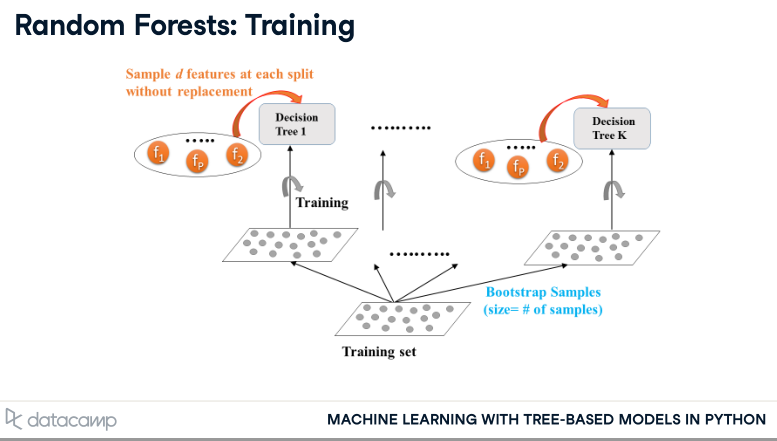


When a tree is trained, at each node, only d features are sampled from all features without replacement.

The node is then split using the sampled feature that maximizes information gain. In scikit-learn d defaults to the square-root of the number of features. 

> For example, if there are 100 features, only 10 features are sampled at each node.

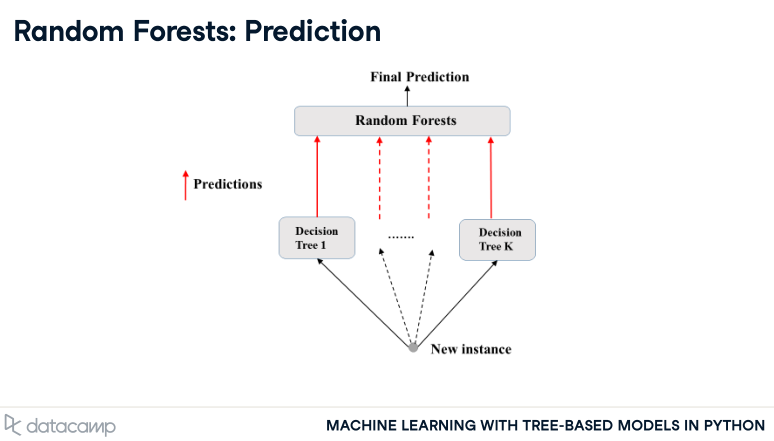

Once trained, predictions can be made on new instances. 

When a new instance is fed to the different base estimators, each of them outputs a prediction. The predictions are then collected by the random forests meta-classifier and a final prediction is made depending on the nature of the problem.

* For classification, the final prediction is made by majority voting. The corresponding scikit-learn class is RandomForestClassifier. 

* For regression, the final prediction is the average of all the labels predicted by the base estimators. 

> The corresponding scikit-learn class is RandomForestRegressor. In general, **Random Forests achieves a lower variance than individual trees**.

**Random Forests Regressor in sklearn**

*  import RandomForestRegressor, train_test_split and mean_squared_error as MSE, split the dataset into 70%-train and 30%-test

```
# Basic imports
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
# Set seed for reproducibility
SEED = 1
# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.3,
random_state=SEED)
```

*  instantiate a RandomForestRegressor consisting of 400 regression trees. This can be done by setting n_estimators to 400. In addition, set min_samples_leaf to 0-dot-12 so that each leaf contains at least 12% of the data used in training.

```
# Instantiate a random forests regressor 'rf' 400 estimators
rf = RandomForestRegressor(n_estimators=400,
min_samples_leaf=0.12,
random_state=SEED)
```

* fit rf to the training set and predict the test set labels. Finally, print the test set RMSE. 

```
# Fit 'rf' to the training set
rf.fit(X_train, y_train)

# Predict the test set labels 'y_pred'
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print the test set RMSE
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 3.98
```
> The result shows that rf achieves a test set RMSE of 3-dot-98; this error is smaller than that achieved by a single regression tree which is 4-dot-43.


**Feature Importance**

When a tree based method is trained, the predictive power of a feature or its importance can be assessed.

*In scikit-learn, feature importance is assessed by measuring how much the tree nodes use a particular feature to reduce impurity.*

> importance of a feature is expressed as a percentage indicating the weight of that feature in training and prediction.

 Once you train a tree-based model in scikit-learn, the features importances can be accessed by extracting the ```feature_importance_``` attribute from the model.

 To visualize the importance of features as assessed by rf, you can create a pandas series of the features importances and then sort this series and make a horiztonal-barplot.

 ```
import pandas as pd
import matplotlib.pyplot as plt
# Create a pd.Series of features importances
importances_rf = pd.Series(rf.feature_importances_, index = X.columns)
# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()
# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='lightgreen'); plt.show()
```
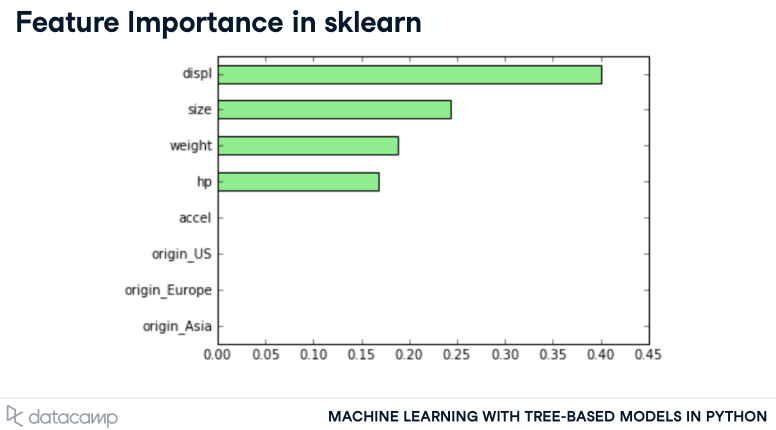

> The results show that, according to rf, displ, size, weight and hp are the most predictive features


**Train an RF regressor**

predict bike rental demand in the Capital Bikeshare program in Washington, D.C using historical weather data from the Bike Sharing Demand dataset available through Kaggle. For this purpose, you will be using the random forests algorithm. As a first step, you'll define a random forests regressor and fit it to the training set.

The dataset is processed for you and split into 80% train and 20% test. The features matrix X_train and the array y_train are available in your workspace.

* Import RandomForestRegressor from sklearn.ensemble.

* Instantiate a RandomForestRegressor called rf consisting of 25 trees.

* Fit rf to the training set.

```
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
            random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train) 
```

**Evaluate the RF regressor**

evaluate the test set RMSE of the random forests regressor rf that you trained in the previous exercise.

The dataset is processed for you and split into 80% train and 20% test. The features matrix X_test, as well as the array y_test are available in your workspace. In addition, we have also loaded the model rf that you trained in the previous exercise.

* Import mean_squared_error from sklearn.metrics as MSE.
* Predict the test set labels and assign the result to y_pred.
* Compute the test set RMSE and assign it to rmse_test.

```
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE
import numpy as np
# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = np.sqrt(MSE(y_test, y_pred))

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))
```

```
<script.py> output:
    Test set RMSE of rf: 51.97
```

> The test set RMSE achieved by rf is significantly smaller than that achieved by a single CART!

**Visualizing features importances**

determine which features were the most predictive according to the random forests regressor rf that you trained in a previous exercise.

For this purpose, you'll draw a horizontal barplot of the feature importance as assessed by rf. Fortunately, this can be done easily thanks to plotting capabilities of pandas.

We have created a pandas.Series object called importances containing the feature names as index and their importances as values. In addition, matplotlib.pyplot is available as plt and pandas as pd.

* Call the .sort_values() method on importances and assign the result to importances_sorted.

* Call the .plot() method on importances_sorted and set the arguments:

  * kind to 'barh'
  * color to 'lightgreen'

```
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()
```

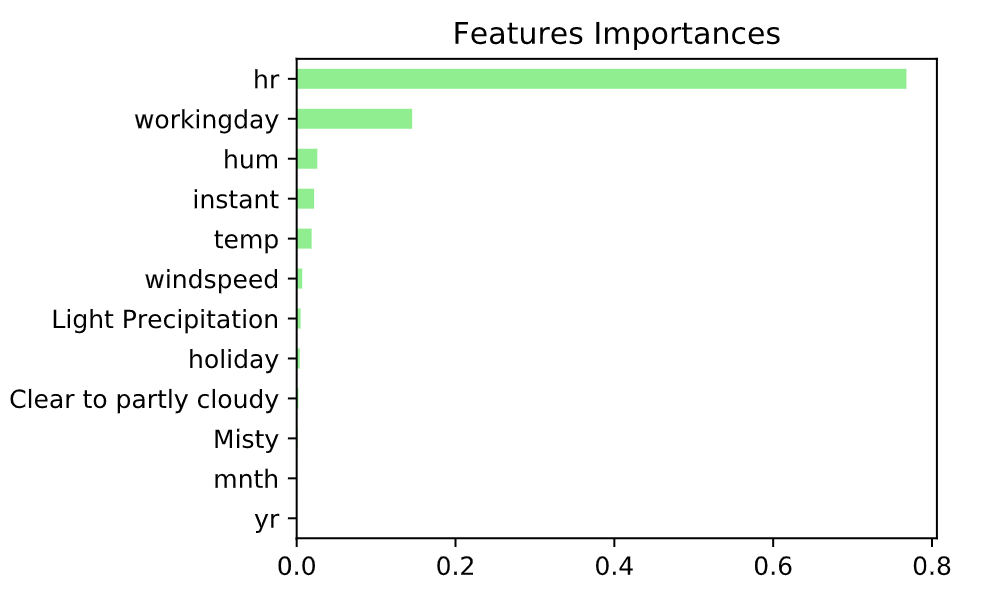

> Apparently, hr and workingday are the most important features according to rf. The importances of these two features add up to more than 90%!

##Boosting
Boosting refers to an ensemble method in which several models are trained sequentially with each model learning from the errors of its predecessors. 
###Adaboost

*in boosting many weak learners are combined to form a strong learner*

 A weak learner is a model doing slightly better than random guessing.
 > For example, a decision tree with a maximum-depth of one, known as a decision-stump, is a weak learner.

In boosting, an ensemble of predictors are trained sequentially and each predictor tries to correct the errors made by its predecessor. 

**Adaboost**

*Adaptive Boosting*

 In AdaBoost, each predictor pays more attention to the instances wrongly predicted by its predecessor by constantly changing the weights of training instances. Furthermore, each predictor is assigned a coefficient alpha that weighs its contribution in the ensemble's final prediction. Alpha depends on the predictor's training error.

**AdaBoost: Training**

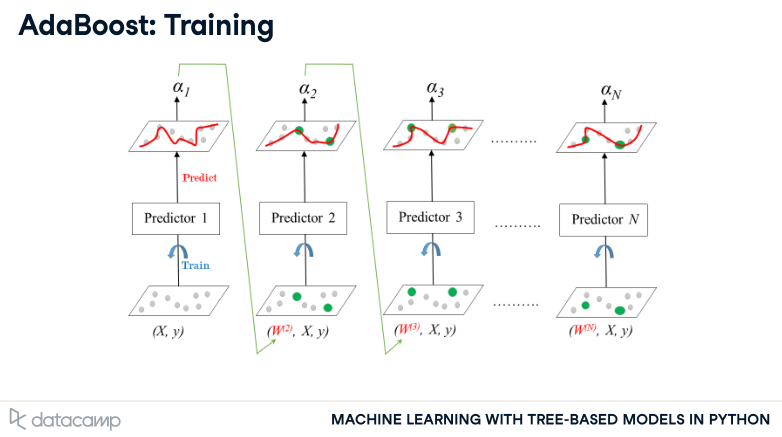

there are N predictors in total

* First, **predictor1** is *trained on the initial dataset (X,y)*, and the training error for predictor1 is determined. 
> This error can then be used to determine **alpha1** which is predictor1's coefficient. 
* **Alpha1** is then used to determine the **weights W(2)** of the training instances for predictor2. 

Notice how the incorrectly predicted instances shown in green acquire higher weights.

 When the weighted instances are used to train predictor2, this predictor is forced to pay more attention to the incorrectly predicted instances. This process is repeated sequentially, until the N predictors forming the ensemble are trained.

**Learning Rate**

An important parameter used in training is the learning rate, eta. 

Eta is a **number between 0 and 1**; it is used to shrink the coefficient alpha of a trained predictor. 

>  It's important to note that there's a trade-off between eta and the number of estimators. A smaller value of eta should be compensated by a greater number of estimators.

**AdaBoost: Prediction**

Once all the predictors in the ensemble are trained, the label of a new instance can be predicted depending on the nature of the problem.

* For classification, each predictor predicts the label of the new instance and the ensemble's prediction is obtained by weighted majority voting.

* For regression, the same procedure is applied and the ensemble's prediction is obtained by performing a weighted average. 

> It's important to note that individual predictors need not to be CARTs. However CARTs are used most of the time in boosting because of their high variance.

**AdaBoost Classification in sklearn**

* import AdaBoostClassifier, DecisionTreeClassifier, roc_auc_score, and train_test_split, split the data into 70%-train and 30%-test 

```
# Import models and utility functions
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# Set seed for reproducibility
SEED = 1

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
stratify=y,
random_state=SEED)
```

* instantiate a DecisionTreeClassifier with the parameter max_depth set to 1. After that, instantiate an AdaBoostClassifier called adb_clf consisting of 100 decision-stumps. This can be done by setting the parameters base_estimator to dt and n_estimators to 100.

```
 Instantiate a classification-tree 'dt'
dt = DecisionTreeClassifier(max_depth=1, random_state=SEED)

# Instantiate an AdaBoost classifier 'adab_clf'
adb_clf = AdaBoostClassifier(base_estimator=dt, n_estimators=100)
```

* fit adb_clf to the training set and predict the probability of obtaining the positive class in the test set as shown here.

```
# Fit 'adb_clf' to the training set
adb_clf.fit(X_train, y_train)

# Predict the test set probabilities of positive class
y_pred_proba = adb_clf.predict_proba(X_test)[:,1]
```

* This enables you to evaluate the ROC-AUC score of adb_clf by calling the function roc_auc_score and passing the parameters y_test and y_pred_proba.

```
# Evaluate test-set roc_auc_score
adb_clf_roc_auc_score = roc_auc_score(y_test, y_pred_proba)

# Print adb_clf_roc_auc_score
print('ROC AUC score: {:.2f}'.format(adb_clf_roc_auc_score))

ROC AUC score: 0.99
```

**Define the AdaBoost classifier**

Predict whether a patient suffers from a liver disease using 10 features including Albumin, age and gender. However, this time, you'll be training an AdaBoost ensemble to perform the classification task. In addition, given that this dataset is imbalanced, you'll be using the ROC AUC score as a metric instead of accuracy.

As a first step, you'll start by instantiating an AdaBoost classifier.


* Import AdaBoostClassifier from sklearn.ensemble.

* Instantiate a DecisionTreeClassifier with max_depth set to 2.

* Instantiate an AdaBoostClassifier consisting of 180 trees and setting the base_estimator to dt.

```
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# Instantiate dt
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

# Instantiate ada
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=180, random_state=1)
```

**Train the AdaBoost classifier**

Now that you've instantiated the AdaBoost classifier ada, it's time train it. You will also predict the probabilities of obtaining the positive class in the test set. This can be done as follows:

Once the classifier ada is trained, call the .predict_proba() method by passing X_test as a parameter and extract these probabilities by slicing all the values in the second column as follows:
```
ada.predict_proba(X_test)[:,1]
```

ada.predict_proba(X_test)[:,1]
The Indian Liver dataset is processed for you and split into 80% train and 20% test. Feature matrices X_train and X_test, as well as the arrays of labels y_train and y_test are available in your workspace. In addition, we have also loaded the instantiated model ada from the previous exercise.

* Fit ada to the training set.

* Evaluate the probabilities of obtaining the positive class in the test set.

```
# Fit ada to the training set
ada.fit(X_train, y_train)

# Compute the probabilities of obtaining the positive class
y_pred_proba = ada.predict_proba(X_test)[:,1]
```

**Evaluate the AdaBoost classifier**

evaluate ada's ROC AUC score. Recall that the ROC AUC score of a binary classifier can be determined using the roc_auc_score() function from sklearn.metrics.

The arrays y_test and y_pred_proba that you computed in the previous exercise are available in your workspace.

* Import roc_auc_score from sklearn.metrics.

* Compute ada's test set ROC AUC score, assign it to ada_roc_auc, and print it out.

```
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Evaluate test-set roc_auc_score
ada_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(ada_roc_auc))
```

```
ROC AUC score: 0.71
```

###Gradient Boosting (GB)

Gradient Boosting is a popular boosting algorithm that has a proven track record of winning many machine learning competitions.

**Gradient Boosted Trees**

In gradient boosting, each predictor in the ensemble corrects its predecessor's error.

> In contrast to AdaBoost, the weights of the training instances are not tweaked. Instead, **each predictor is trained using the residual errors of its predecessor as labels**. 

**Gradient Boosted Trees for Regression: Training**

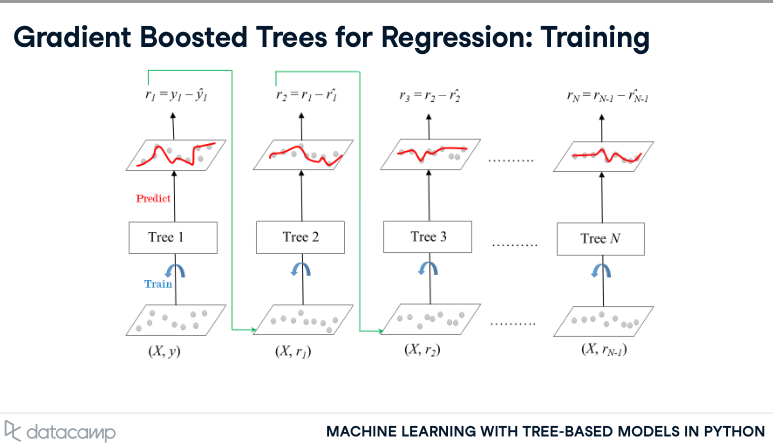

The ensemble consists of N trees. 

* Tree1 is trained using the features matrix X and the dataset labels y. The predictions labeled y1hat are used to determine the training set residual errors r1. 
* Tree2 is then trained using the features matrix X and the residual errors r1 of Tree1 as labels. The predicted residuals r1hat are then used to determine the residuals of residuals which are labeled r2. 

This process is repeated until all of the N trees forming the ensemble are trained.

**Shrinkage**

An important parameter used in training gradient boosted trees is **shrinkage**.

In this context, shrinkage refers to the fact that the prediction of each tree in the ensemble is shrinked after it is multiplied by a learning rate eta which is a number between 0 and 1.

>  Similarly to AdaBoost, there's a trade-off between eta and the number of estimators. 

Decreasing the learning rate needs to be compensated by increasing the number of estimators in order for the ensemble to reach a certain performance.

**Gradient Boosted Trees: Prediction**

Once all trees in the ensemble are trained, prediction can be made. When a new instance is available, each tree predicts a label and the final ensemble prediction is given by the formula shown on this slide. In scikit-learn, the class for a gradient boosting regressor is GradientBoostingRegressor.

> a similar algorithm is used for classification problems.

**Gradient Boosting in sklearn**

* import GradientBoostingRegressor from sklearn.ensemble. Also, import the functions train_test_split and mean_squared_error as MSE as shown here. Then split the dataset into 70%-train and 30%-test.

```
# Import models and utility functions
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

# Set seed for reproducibility
SEED = 1

# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X,y,
test_size=0.3,
random_state=SEED)
```

*  instantiate a GradientBoostingRegressor gbt consisting of 300 decision-stumps. This can be done by setting the parameters n_estimators to 300 and max_depth to 1. Finally, fit gbt to the training set and predict the test set labels. Compute the test set RMSE as shown here and print the value

```
# Instantiate a GradientBoostingRegressor 'gbt'
gbt = GradientBoostingRegressor(n_estimators=300, max_depth=1, random_state=SEED)

# Fit 'gbt' to the training set
gbt.fit(X_train, y_train)

# Predict the test set labels
y_pred = gbt.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print the test set RMSE
print('Test set RMSE: {:.2f}'.format(rmse_test))

Test set RMSE: 4.01

```

**Define the GB regressor**

your task is to predict the bike rental demand using historical weather data from the Capital Bikeshare program in Washington, D.C.. For this purpose, you'll be using a gradient boosting regressor.

As a first step, you'll start by instantiating a gradient boosting regressor which you will train in the next exercise.

* Import GradientBoostingRegressor from sklearn.ensemble.

* Instantiate a gradient boosting regressor by setting the parameters:

  * max_depth to 4

  * n_estimators to 200


```
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate gb
gb = GradientBoostingRegressor(max_depth=4, 
            n_estimators=200,
            random_state=2)
```

**Train the GB regressor**

 train the gradient boosting regressor gb that you instantiated in the previous exercise and predict test set labels.

The dataset is split into 80% train and 20% test. Feature matrices X_train and X_test, as well as the arrays y_train and y_test are available in your workspace. In addition, we have also loaded the model instance gb that you defined in the previous exercise.

* Fit gb to the training set.
* Predict the test set labels and assign the result to y_pred.

```
# Fit gb to the training set
gb.fit(X_train, y_train)

# Predict test set labels
y_pred = gb.predict(X_test)
```

**Evaluate the GB regressor**

 evaluate the test set Root Mean Squared Error (RMSE) of gb.

y_test and predictions y_pred are available in your workspace.

* Import mean_squared_error from sklearn.metrics as MSE.

* Compute the test set MSE and assign it to mse_test.

* Compute the test set RMSE and assign it to rmse_test.

```
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error
import numpy as np

# Compute MSE
mse_test = mean_squared_error(y_test, y_pred)

# Compute RMSE
rmse_test = np.sqrt(mse_test)

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))
```

```
Test set RMSE of gb: 52.065
```

###Stochastic Gradient Boosting (SGB)

Gradient boosting involves an exhaustive search procedure. Each tree in the ensemble is trained to find the best split-points and the best features. **This procedure may lead to CARTs that use the same split-points and possibly the same features**.

**Stochastic Gradient Boosting**

To mitigate these effects, you can use an algorithm known as stochastic gradient boosting. 

*In stochastic gradient boosting, each CART is trained on a random subset of the training data.*

 This subset is sampled without replacement. Furthermore, at the level of each node, features are sampled without replacement when choosing the best split-points. As a result, this creates further diversity in the ensemble and the net effect is adding more variance to the ensemble of trees.
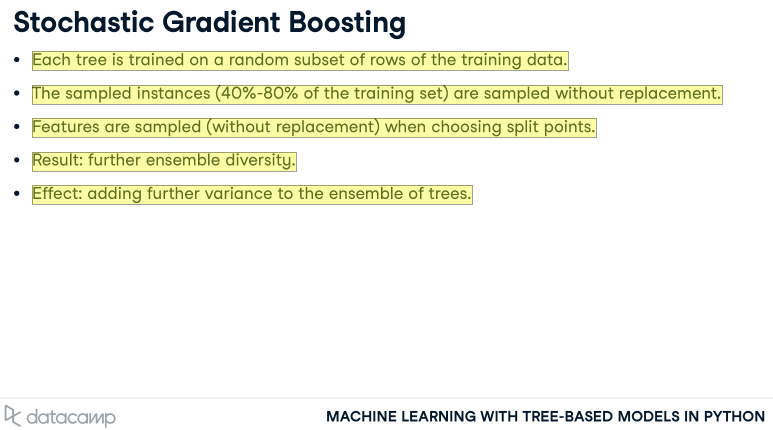
**Stochastic Gradient Boosting: Training**




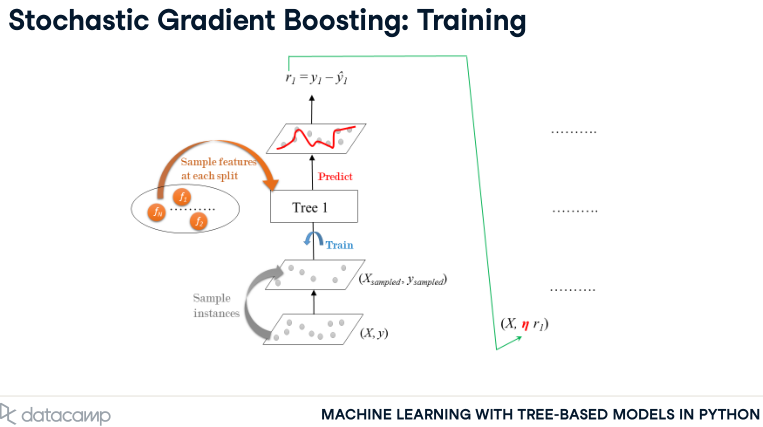

* First, instead of providing all the training instances to a tree, only a fraction of these instances are provided through sampling without replacement. 

> The sampled data is then used for training a tree. 

* Not all features are considered when a split is made. Instead, only a certain randomly sampled fraction of these features are used for this purpose. 

* Once a tree is trained, predictions are made and the residual errors can be computed. These residual errors are multiplied by the learning rate eta and are fed to the next tree in the ensemble.

*  This procedure is repeated sequentially until all the trees in the ensemble are trained. 

* The prediction procedure for a new instance in stochastic gradient boosting is similar to that of gradient boosting.

**Stochastic Gradient Boosting in sklearn**

* define a stochastic-gradient-boosting-regressor named sgbt consisting of 300 decision-stumps. This can be done by setting the parameters max_depth to 1 and n_estimators to 300. Here, the parameter subsample was set to 0-dot-8 in order for each tree to sample 80% of the data for training. Finally, the parameter max_features was set to 0-dot-2 so that each tree uses 20% of available features to perform the best-split.

```
# Import models and utility functions
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

# Set seed for reproducibility
SEED = 1

# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X,y,
test_size=0.3,
random_state=SEED)

# Instantiate a stochastic GradientBoostingRegressor 'sgbt'
sgbt = GradientBoostingRegressor(max_depth=1,
subsample=0.8,
max_features=0.2,
n_estimators=300,
random_state=SEED)
```
* fit sgbt to the training set and predict the test set labels. Compute the test set RMSE and print it. The result shows that sgbt achieves a test set RMSE of 3-dot-95.

```
# Fit 'sgbt' to the training set
sgbt.fit(X_train, y_train)

# Predict the test set labels
y_pred = sgbt.predict(X_test)

# Evaluate test set RMSE 'rmse_test'
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print 'rmse_test'
print('Test set RMSE: {:.2f}'.format(rmse_test))

Test set RMSE: 3.95
```

**Regression with SGB**

solve this bike count regression problem using stochastic gradient boosting.

* Instantiate a Stochastic Gradient Boosting Regressor (SGBR) and set:

  * max_depth to 4 and n_estimators to 200,

  * subsample to 0.9, and

  * max_features to 0.75.

```
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate sgbr
sgbr = GradientBoostingRegressor(max_depth=4, 
            subsample=0.9,
            max_features=0.75,
            n_estimators=200,                                
            random_state=2)
```

**Train the SGB regressor**

train the SGBR sgbr instantiated in the previous exercise and predict the test set labels.

The bike sharing demand dataset is already loaded processed for you; it is split into 80% train and 20% test. The feature matrices X_train and X_test, the arrays of labels y_train and y_test, and the model instance sgbr that you defined in the previous exercise are available in your workspace.

* Fit sgbr to the training set.
* Predict the test set labels and assign the results to y_pred.

```
# Fit sgbr to the training set
sgbr.fit(X_train, y_train)

# Predict test set labels
y_pred = sgbr.predict(X_test)
```

**Evaluate the SGB regressor**

You have prepared the ground to determine the test set RMSE of sgbr which you shall evaluate in this exercise.

y_pred and y_test are available in your workspace.

* Import mean_squared_error as MSE from sklearn.metrics.

* Compute test set MSE and assign the result to mse_test.

* Compute test set RMSE and assign the result to rmse_test.

```
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE
import numpy as np
# Compute test set MSE
mse_test = MSE(y_test, y_pred)

# Compute test set RMSE
rmse_test = np.sqrt(mse_test)

# Print rmse_test
print('Test set RMSE of sgbr: {:.3f}'.format(rmse_test))
```

```
Test set RMSE of sgbr: 49.979
```

> The stochastic gradient boosting regressor achieves a lower test set RMSE than the gradient boosting regressor (which was 52.065)!



##Model Tuning

The hyperparameters of a machine learning model are parameters that are not learned from data. They should be set prior to fitting the model to the training set. 

To obtain a better performance, the hyperparameters of a machine learning should be tuned.

###Tuning a CART's Hyperparameters

Machine learning models are characterized by parameters and hyperparameters. 

* **Parameters** are learned from data through training; examples of parameters include the **split-feature and the split-point of a node in a CART**.
* **Hyperparameters** are not learned from data; they should be set prior to training. Examples of hyperparameters **include the maximum-depth and the splitting-criterion of a CART**.

*What is hyperparameter tuning?*

Hyperparameter tuning consists of searching for the set of optimal hyperparameters for the learning algorithm. 

> The solution involves finding the set of optimal hyperparameters yielding an optimal model. The optimal model yields an optimal score. 

The score function measures the agreement between true labels and a model's predictions. 

In sklearn, it defaults to:
* accuracy for classifiers
* r-squared for regressors
* model's generalization performance is evaluated using cross-validation.

In scikit-learn, a model's default hyperparameters are not optimal for all problems. Hyperparameters should be tuned to obtain the best model performance.


> So in order to receive the best result for the selected model, tunning the hyperameter is a must. 

Now there are many approaches for hyperparameter tuning including: grid-search, random-search, and so on.

**Grid search cross validation: example**

Consider the case of a CART where you search through the two-dimensional hyperparameter grid shown here. The dimensions correspond to the CART's maximum-depth and the minimum-percentage of samples per leaf. For each combination of hyperparameters, the cross-validation score is evaluated using k-fold CV for example. Finally, the optimal hyperparameters correspond to the model achieving the best cross-validation score.

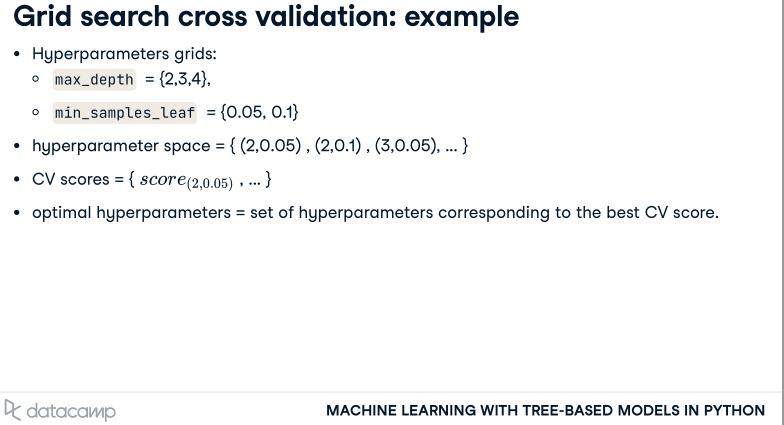

**Inspecting the hyperparameters of a CART in sklearn**

* instantiate a DecisionTreeClassifier dt 

```
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Set seed to 1 for reproducibility
SEED = 1

# Instantiate a DecisionTreeClassifier 'dt'
dt = DecisionTreeClassifier(random_state=SEED)
```

* call dt's -dot-get_params() method

```
# Print out 'dt's hyperparameters
print(dt.get_params())
```

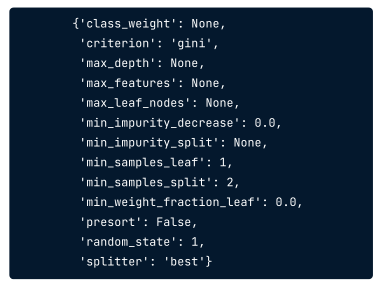

> This prints out a dictionary where the keys are the hyperparameter names. 

we'll only be optimizing max_depth, max_features and min_samples_leaf.

! Note that *max_features is the number of features to consider when looking for the best split*.

**Grid search CV in sklearn**

* import GridSearchCV from sklearn-dot-model_selection. Then, define a dictionary called params_dt containing the names of the hyperparameters to tune as keys and lists of hyperparameter-values as values. Once done, instantiate a GridSearchCV object grid_dt by passing dt as an estimator and params_dt as param_grid. Also set scoring to accuracy and cv to 10 in order to use 10-fold stratified cross-validation for model evaluation. Finally, fit grid_dt to the training set.

```
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters 'params_dt'
params_dt = {
'max_depth': [3, 4,5, 6],
'min_samples_leaf': [0.04, 0.06, 0.08],
'max_features': [0.2, 0.4,0.6, 0.8]
}

# Instantiate a 10-fold CV grid search object 'grid_dt'
grid_dt = GridSearchCV(estimator=dt,
param_grid=params_dt,
scoring='accuracy',
cv=10,
n_jobs=-1)

# Fit 'grid_dt' to the training data
grid_dt.fit(X_train, y_train)
```

**Extracting the best hyperparameters**

* After training grid_dt, the best set of hyperparameter-values can be extracted from the attribute -dot-best_params_ of grid_dt. Also, **the best cross validation accuracy can be accessed through grid_dt's** ```.best_score_ attribute```.

```
# Extract best hyperparameters from 'grid_dt'
best_hyperparams = grid_dt.best_params_

print('Best hyerparameters:\n', best_hyperparams)

Best hyerparameters:
{'max_depth': 3, 'max_features': 0.4, 'min_samples_leaf': 0.06}
```

**Extracting the best estimator**

* the best-model can be extracted using the ```.best_estimator attribute```. Note that this model is fitted on the whole training set because the refit parameter of GridSearchCV is set to True by default.

```
# Extract best CV score from 'grid_dt'
best_CV_score = grid_dt.best_score_

print('Best CV accuracy'.format(best_CV_score))
Best CV accuracy: 0.938
```

* Finally, you can evaluate this model's test set accuracy using the score method. The result is about 94-dot-7% while the score of an untuned CART is of 93%.

```
# Extract best model from 'grid_dt'
best_model = grid_dt.best_estimator_

# Evaluate test set accuracy
test_acc = best_model.score(X_test,y_test)

# Print test set accuracy
print("Test set accuracy of best model: {:.3f}".format(test_acc))

Test set accuracy of best model: 0.947
```

**Set the tree's hyperparameter grid**

set the grid of hyperparameters that will be used to tune the classification tree dt and find the optimal classifier in the next exercise.

* Define a grid of hyperparameters corresponding to a Python dictionary called params_dt with:

  * the key 'max_depth' set to a list of values 2, 3, and 4

  * the key 'min_samples_leaf' set to a list of values 0.12, 0.14, 0.16, 0.18

```
# Define params_dt
params_dt = {'max_depth': [2,3,4], 'min_samples_leaf': [0.12, 0.14, 0.16, 0.18]}
```

**Search for the optimal tree** perform grid search using 5-fold cross validation to find dt's optimal hyperparameters. 

Note that because grid search is an exhaustive process, it may take a lot time to train the model.

Here you'll only be instantiating the GridSearchCV object without fitting it to the training set. As discussed in the video, you can train such an object similar to any scikit-learn estimator by using the .fit() method:

```
grid_object.fit(X_train, y_train)
```

An untuned classification tree dt as well as the dictionary params_dt that you defined in the previous exercise are available in your workspace.

* Import GridSearchCV from sklearn.model_selection.

* Instantiate a GridSearchCV object using 5-fold CV by setting the parameters:

  * estimator to dt, param_grid to params_dt and

  * scoring to 'roc_auc'.

```
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Instantiate grid_dt
grid_dt = GridSearchCV(estimator=dt,
                       param_grid=params_dt,
                       scoring='roc_auc',
                       cv=5,
                       n_jobs=-1)
```

**Evaluate the optimal tree** evaluate the test set ROC AUC score of grid_dt's optimal model.

first determine the probability of obtaining the positive label for each test set observation. 

> You can use the ```methodpredict_proba()``` of an sklearn classifier to compute a 2D array containing the probabilities of the negative and positive class-labels respectively along columns.

The dataset is already loaded and processed for you (numerical features are standardized); it is split into 80% train and 20% test. X_test, y_test are available in your workspace. In addition, we have also loaded the trained GridSearchCV object grid_dt that you instantiated in the previous exercise. Note that grid_dt was trained as follows:

```
grid_dt.fit(X_train, y_train)
```

* Import roc_auc_score from sklearn.metrics.

* Extract the .best_estimator_ attribute from grid_dt and assign it to best_model.

* Predict the test set probabilities of obtaining the positive class y_pred_proba.

* Compute the test set ROC AUC score test_roc_auc of best_model.

```
# Import roc_auc_score from sklearn.metrics
from sklearn.metrics import roc_auc_score

# Extract the best estimator
best_model = grid_dt.best_estimator_

# Predict the test set probabilities of the positive class
y_pred_proba = best_model.predict_proba(X_test)[:,1]

# Compute test_roc_auc
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))
```

```
Test set ROC AUC score: 0.610
```

###Tuning a RF's Hyperparameters

In addition to the hyperparameters of the CARTs forming random forests, the ensemble itself is characterized by other hyperparameters such as the number of estimators, whether it uses bootstraping or not and so on.

**Tuning is expensive**

As a note, hyperparameter tuning is computationally expensive and may sometimes lead only to very slight improvement of a model's performance. For this reason, it is desired to weigh the impact of tuning on the pipeline of your data analysis project as a whole in order to understand if it is worth pursuing.

**Inspecting RF Hyperparameters in sklearn**

To inspect the hyperparameters of a RandomForestRegressor:

* import RandomForestRegressor from sklearn.ensemble and then instantiate a RandomForestRegressor rf

```
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Set seed for reproducibility
SEED = 1

# Instantiate a random forests regressor 'rf'
rf = RandomForestRegressor(random_state= SEED)
```

* The hyperparameters of rf along with their default values can be accessed by calling rf's dot-get_params() method.

```
# Inspect rf' s hyperparameters
rf.get_params()
```

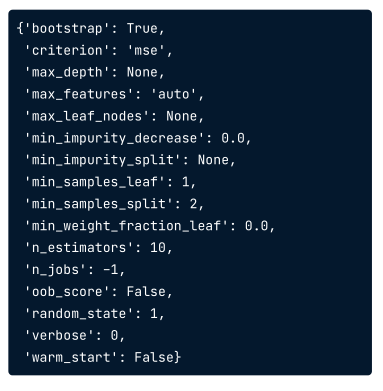

> In the following, we'll be optimizing n_estimators, max_depth, min_samples_leaf and max_features. 

**GridSearchCV in sklearn**

* import mean_squared_error as MSE from sklearn.metrics and GridSearchCV from sklearn.model_selection. Then, define a dictionary called params_rf containing the grid of hyperparameters. Finally, instantiate a GridSearchCV object called grid_rf and pass the parameters rf as estimator, params_rf as param_grid. Also set cv to 3 to perform 3-fold cross-validation. In addition, set scoring to neg_mean_squared_error in order to use negative mean squared error as a metric. 

Note that the **parameter verbose controls verbosity**; the *higher its value, the more messages are printed during fitting.*

```
# Basic imports
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV

# Define a grid of hyperparameter 'params_rf'
params_rf = {
'n_estimators': [300, 400, 500],
'max_depth': [4, 6, 8],
'min_samples_leaf': [0.1, 0.2],
'max_features': ['log2', 'sqrt']
}

# Instantiate 'grid_rf'
grid_rf = GridSearchCV(estimator=rf,
param_grid=params_rf,
cv=3,
scoring='neg_mean_squared_error',
verbose=1,
n_jobs=-1)
```

*  fit grid_rf to the training.
```
# Fit 'grid_rf' to the training set
grid_rf.fit(X_train, y_train)
```

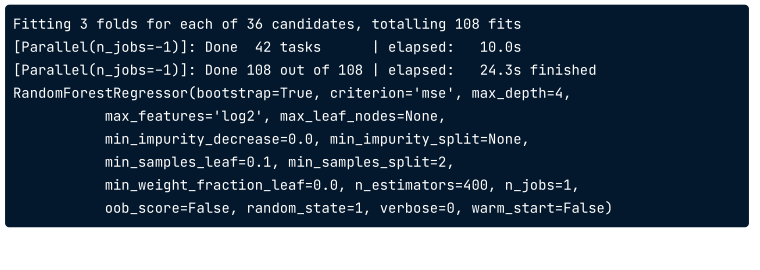

> The output shows messages related to grid fitting as well as the obtained optimal model.

**Extracting the best hyperparameters**

* extract rf's best hyperparameters by getting the attribute best_params_ from grid_rf

```
# Extract the best hyperparameters from 'grid_rf'
best_hyperparams = grid_rf.best_params_

print('Best hyperparameters:\n', best_hyperparams)

Best hyperparameters:
{'max_depth': 4,
'max_features': 'log2',
'min_samples_leaf': 0.1,
'n_estimators': 400}
```

**Evaluating the best model performance**

* extract the best model from rf. This enables you to predict the test set labels and evaluate the test-set RMSE. 

```
# Extract the best model from 'grid_rf'
best_model = grid_rf.best_estimator_

# Predict the test set labels
y_pred = best_model.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print the test set RMSE
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 3.89
```

> The output shows a result of 3.89. If you would have trained an untuned model, the RMSE would be 3.98.


**Set the hyperparameter grid of RF**

manually set the grid of hyperparameters that will be used to tune rf's hyperparameters and find the optimal regressor. 

For this purpose, you will be constructing a grid of hyperparameters and tune the number of estimators, the maximum number of features used when splitting each node and the minimum number of samples (or fraction) per leaf.

* Define a grid of hyperparameters corresponding to a Python dictionary called params_rf with:

  * the key 'n_estimators' set to a list of values 100, 350, 500

  * the key 'max_features' set to a list of values 'log2', 'auto', 'sqrt'

  * the key 'min_samples_leaf' set to a list of values 2, 10, 30

```
# Define the dictionary 'params_rf'
params_rf = {'n_estimators': [100, 350, 500], 'max_features': ['log2', 'auto', 'sqrt'], 'min_samples_leaf': [2, 10, 30]}
```

**Search for the optimal forest**

perform grid search using 3-fold cross validation to find rf's optimal hyperparameters. To evaluate each model in the grid, you'll be using the negative mean squared error metric.

Note that because grid search is an exhaustive search process, it may take a lot time to train the model. Here you'll only be instantiating the GridSearchCV object without fitting it to the training set. As discussed in the video, you can train such an object similar to any scikit-learn estimator by using the .fit() method:

```
grid_object.fit(X_train, y_train)
```

The untuned random forests regressor model rf as well as the dictionary params_rf that you defined in the previous exercise are available in your workspace.

* Import GridSearchCV from sklearn.model_selection.

* Instantiate a GridSearchCV object using 3-fold CV by using negative mean squared error as the scoring metric.

```
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=3,
                       verbose=1,
                       n_jobs=-1)
```

**Evaluate the optimal forest**

evaluate the test set RMSE of grid_rf's optimal model.

The dataset is already loaded and processed for you and is split into 80% train and 20% test. In your environment are available X_test, y_test and the function mean_squared_error from sklearn.metrics under the alias MSE. In addition, we have also loaded the trained GridSearchCV object grid_rf that you instantiated in the previous exercise. Note that grid_rf was trained as follows:

```
grid_rf.fit(X_train, y_train)
```

* Import mean_squared_error as MSE from sklearn.metrics.

* Extract the best estimator from grid_rf and assign it to best_model.

* Predict best_model's test set labels and assign the result to y_pred.

* Compute best_model's test set RMSE.


```
# Import mean_squared_error from sklearn.metrics as MSE 
from sklearn.metrics import mean_squared_error as MSE

# Extract the best estimator
best_model = grid_rf.best_estimator_

# Predict test set labels
y_pred = best_model.predict(X_test)

# Compute rmse_test
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test RMSE of best model: {:.3f}'.format(rmse_test)) 
```

```
 Test RMSE of best model: 50.569
```
